In [1]:
from usde.usde import USDE

In [2]:
# create USDE object
usde = USDE()

In [3]:
# The reddit API needs these credentials
reddit_api_credentials = {
    "client_id": ' ',
    "client_secret": ' ',
    "user_agent": ' ',
    "username": " ",
    "password": " "
}

# create the reddit object
reddit = usde.get_reddit(reddit_api_credentials)

# Find Subreddits by Keyword

In [4]:
keyword = "python"

# Every function call modifies the graph that is sent as input
# subreddits_name = usde.create_graph()
# reddit.fetch_subreddits_by_name(subreddits_name, keyword, limit=3)

# However, it also returns the graph modified so you can assign it to other variables like so:
subreddits_name = reddit.fetch_subreddits_by_name(usde.create_graph(), keyword, limit=5)

In [5]:
# To get the list of available nodes
# However, there's only one type in this case
print(subreddits_name.get_nodes().keys())

dict_keys(['subreddit'])


In [6]:
# You can get the dataframe from Pandas by specifying the node
subreddit_df = subreddits_name.get_df("subreddit")

In [7]:
subreddit_df.head(5)

,_id,Label,label_attribute,notification_level,user_flair_background_color,wls,banner_img,user_sr_theme_enabled,user_flair_text,submit_text_html,...,accounts_active_is_fuzzed,advertiser_category,public_description,link_flair_enabled,allow_images,videostream_links_count,comment_score_hide_mins,show_media_preview,submission_type,user_is_subscriber
0,2qh0y,subreddit,subreddit,None,None,6,,True,None,None,...,False,Technology,"news about the dynamic, interpreted, interacti...",True,True,0,0,True,any,False
1,2tqzl,subreddit,subreddit,None,None,None,,True,None,None,...,False,None,,False,True,0,0,True,any,False
2,3l7v1,subreddit,subreddit,None,None,None,,True,None,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",...,False,None,A place to discuss Python 2.7 without all of h...,False,False,0,0,True,any,False
3,3evbu,subreddit,subreddit,None,None,None,,True,None,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",...,False,None,A place to get a quick fix of python tips and ...,True,False,NaN,0,True,self,False
4,3649w,subreddit,subreddit,None,None,None,,True,None,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",...,False,None,A subreddit for python developers to share art...,False,False,0,1440,True,any,False


In [8]:
# show the attributes of this node
subreddit_df.iloc[0]

_id                                                                        2qh0y
Label                                                                  subreddit
label_attribute                                                        subreddit
notification_level                                                          None
user_flair_background_color                                                 None
wls                                                                            6
banner_img                                                                      
user_sr_theme_enabled                                                       True
user_flair_text                                                             None
submit_text_html                                                            None
user_flair_css_class                                                        None
user_flair_template_id                                                      None
user_is_banned              

In [9]:
# we can use the display name of the subreddit to look at its submissions
subreddit_df.display_name

0                Python
1             python101
2               Python2
3            pythontips
4          pythoncoding
5       PythonProjects2
6         python_netsec
7    pythonforengineers
8             pythondev
9               python3
Name: display_name, dtype: object

# Find Submissions in a Subreddit

In [10]:
# let's try searching for submissions in Python which is the first result!
subreddit_to_search = subreddit_df.display_name[0]

# Call the appropriate function
subreddit_submissions = reddit.fetch_subreddit_submissions(
        usde.create_graph(), subreddit_name=subreddit_to_search, limit=3)

In [11]:
# Get all the node dataframes available from the query
ss_nodes = subreddit_submissions.get_nodes()

# Find out list of available nodes
print(ss_nodes.keys())

dict_keys(['subreddit', 'redditor', 'submission'])


In [12]:
ss_nodes["submission"].head()

,_id,Label,label_attribute,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,...,author_patreon_flair,author_flair_text_color,permalink,whitelist_status,stickied,url,subreddit_subscribers,created_utc,media,is_video
0,9o5w2z,submission,submission,None,Python,Please read the rules \- they've updated sligh...,t2_628u,False,None,0,...,False,dark,/r/Python/comments/9o5w2z/rpython_official_job...,all_ads,True,https://www.reddit.com/r/Python/comments/9o5w2...,291335,1539547719.0,None,False
1,9uolpb,submission,submission,None,Python,Tell /r/python what you're working on this wee...,t2_6l4z3,False,None,0,...,False,None,/r/Python/comments/9uolpb/whats_everyone_worki...,all_ads,True,https://www.reddit.com/r/Python/comments/9uolp...,291335,1541513354.0,None,False
2,9w6ui2,submission,submission,None,Python,,t2_1giykhsn,False,None,0,...,False,None,/r/Python/comments/9w6ui2/python_in_the_browse...,all_ads,False,https://pythonlinks.info/a-web-without-javascript,291335,1541965993.0,None,False
3,9waaxk,submission,submission,None,Python,"For a project I'm working on, I have 6 variabl...",t2_7pcph,False,None,0,...,False,None,/r/Python/comments/9waaxk/efficient_way_of_gen...,all_ads,False,https://www.reddit.com/r/Python/comments/9waax...,291335,1541992542.0,None,False
4,9w418p,submission,submission,None,Python,,t2_1uxaa1ub,False,None,0,...,False,None,/r/Python/comments/9w418p/how_to_deal_with_con...,all_ads,False,https://blog.daftcode.pl/csi-python-type-syste...,291335,1541945358.0,None,False


In [13]:
ss_nodes["redditor"].head()

,_id,Label,label_attribute,is_employee,icon_img,pref_show_snoovatar,name,is_friend,created,has_subscribed,hide_from_robots,created_utc,link_karma,comment_karma,is_gold,is_mod,verified,subreddit,has_verified_email
0,628u,redditor,redditor,False,https://a.thumbs.redditmedia.com/wSlep7xMBqlqI...,True,aphoenix,False,1147838967.0,True,False,1147810167.0,31954,113266,True,True,True,"{'default_set': True, 'user_is_contributor': F...",True
1,6l4z3,redditor,redditor,False,https://www.redditstatic.com/avatars/avatar_de...,False,AutoModerator,False,1325769868.0,True,False,1325741068.0,1778,445850,True,True,False,None,True
2,1giykhsn,redditor,redditor,False,https://www.redditstatic.com/avatars/avatar_de...,False,PythonLinksDotInfo,False,1527506831.0,True,False,1527478031.0,265,-4,False,False,True,"{'default_set': True, 'user_is_contributor': F...",False
3,7pcph,redditor,redditor,False,https://www.redditstatic.com/avatars/avatar_de...,False,ThatCoxKid,False,1336880760.0,True,False,1336851960.0,4119,12836,False,False,True,"{'default_set': True, 'user_is_contributor': F...",True
4,1uxaa1ub,redditor,redditor,False,https://www.redditstatic.com/avatars/avatar_de...,False,pawel_swiecki,False,1532642642.0,True,False,1532613842.0,134,110,False,False,True,"{'default_set': True, 'user_is_contributor': F...",True


In [14]:
ss_nodes["subreddit"].head()

,_id,Label,label_attribute,notification_level,user_flair_background_color,wls,banner_img,user_sr_theme_enabled,user_flair_text,submit_text_html,...,accounts_active_is_fuzzed,advertiser_category,public_description,link_flair_enabled,allow_images,videostream_links_count,comment_score_hide_mins,show_media_preview,submission_type,user_is_subscriber
0,2qh0y,subreddit,subreddit,None,None,6,,True,None,None,...,False,Technology,"news about the dynamic, interpreted, interacti...",True,True,0,0,True,any,False


In [15]:
# The same works with edges
ss_edges = subreddit_submissions.get_edges()
print(ss_edges.keys())

dict_keys(['posted', 'submission_created_by', 'on', 'has_submission'])


In [16]:
ss_edges["posted"].head()

,Source,Target,Label,label_attribute,_id
0,628u,9o5w2z,POSTED,POSTED,628u9o5w2zPOSTED
1,6l4z3,9uolpb,POSTED,POSTED,6l4z39uolpbPOSTED
2,1giykhsn,9w6ui2,POSTED,POSTED,1giykhsn9w6ui2POSTED
3,7pcph,9waaxk,POSTED,POSTED,7pcph9waaxkPOSTED
4,1uxaa1ub,9w418p,POSTED,POSTED,1uxaa1ub9w418pPOSTED


# Find Comments in a Submission

In [17]:
# Reddit USDE also supports the ability to get comments from a submission
# Let's use the previous result!
ss_nodes["submission"].title

0                          r/Python official Job Board
1                What's everyone working on this week?
2    Python in the Browser: Review of "A Web Withou...
3    Efficient way of generating permutations with ...
4    How to deal with contravariance in Python. Che...
Name: title, dtype: object

In [18]:
# I'm interested in what everyone is working on this week!
# To fetch the comments of that submission, we need its ID
submission_id = ss_nodes["submission"]._id[1]

submission_comments = reddit.fetch_submission_comments(usde.create_graph(), submission_id, limit=5)
sc_nodes = submission_comments.get_nodes()

# View the results
sc_nodes["comment"].head()

,_id,Label,label_attribute,subreddit_id,approved_at_utc,ups,mod_reason_by,banned_by,author_flair_type,removal_reason,...,subreddit,author_flair_text,created_utc,subreddit_name_prefixed,controversiality,depth,author_flair_background_color,mod_reports,mod_note,distinguished
0,e9cdg84,comment,comment,t5_2qh0y,None,1,None,None,text,None,...,Python,None,1541744002.0,r/Python,0,0,None,[],None,None
1,e97on9s,comment,comment,t5_2qh0y,None,1,None,None,text,None,...,Python,None,1541573038.0,r/Python,0,0,None,[],None,None
2,e9f8d5j,comment,comment,t5_2qh0y,None,1,None,None,text,None,...,Python,None,1541863663.0,r/Python,0,0,None,[],None,None
3,e97ls4a,comment,comment,t5_2qh0y,None,1,None,None,text,None,...,Python,None,1541569300.0,r/Python,0,0,None,[],None,None
4,e98emf8,comment,comment,t5_2qh0y,None,1,None,None,text,None,...,Python,None,1541607686.0,r/Python,0,0,None,[],None,None


# Find Redditor's Comment History

In [19]:
# To fetch a redditor's comments, we need to specify the username of the account
# Let's try looking at the comment history of Reddit's admin, spez!

reddit_admin = "spez"
redditor_comments = reddit.fetch_redditor_comments(usde.create_graph(), reddit_admin, limit=5)


# Find Redditor's Submission History

In [20]:
# We can also look at a redditor's submission history (function is pretty similar to the comment history)
redditor_submissions = reddit.fetch_redditor_submissions(usde.create_graph(), reddit_admin, limit=5)

In [21]:
# You can then export the graph into .csv files
# Just call .export_CSV_all() on the graph desired

csv_name = "reddit"
redditor_comments.export_all_CSV(csv_name)

# You can also specify the dataframes "you want to export by using the .export_CSV() function
csv_name = "specific"
nodes = {"redditor", "submission"}
edges = {"posted"}
redditor_comments.export_CSV(csv_name, nodes, edges)

# Visualization with NetworkX

In [22]:
import networkx as nx

In [23]:
nx_graph = nx.Graph()

In [24]:
# We will visualize submission_comments graph
sc_edges = submission_comments.get_edges()

In [25]:
print(sc_edges.keys())

dict_keys(['posted', 'submission_created_by', 'on', 'has_submission', 'commented', 'comment_created_by', 'on_post', 'has_comment'])


In [26]:
print(sc_nodes.keys())

dict_keys(['submission', 'subreddit', 'redditor', 'comment'])


In [27]:
# create graph from edgelist dataframes
for key in sc_edges:
    
    new_graph = nx.from_pandas_edgelist(
        sc_edges[key], source="Source", target="Target", edge_attr=True)
    
    nx_graph = nx.compose(nx_graph, new_graph)

In [28]:
# Add node attributes
for key in sc_nodes:
    df = sc_nodes[key]
    
    for index, row in df.iterrows():
        _id = row["_id"]
        node = nx_graph.node[_id]
        
        for row_key in row.keys():
            node[row_key] = row[row_key]

In [29]:
# Show nodes in the NetworkX graph
list(nx_graph.nodes(data=True))

[('6l4z3',
  {'_id': '6l4z3',
   'Label': 'redditor',
   'label_attribute': 'redditor',
   'is_employee': 'False',
   'icon_img': 'https://www.redditstatic.com/avatars/avatar_default_20_DB0064.png',
   'pref_show_snoovatar': 'False',
   'name': 'AutoModerator',
   'is_friend': 'False',
   'created': '1325769868.0',
   'has_subscribed': 'True',
   'hide_from_robots': 'False',
   'created_utc': '1325741068.0',
   'link_karma': '1778',
   'comment_karma': '445850',
   'is_gold': 'True',
   'is_mod': 'True',
   'verified': 'False',
   'subreddit': 'None',
   'has_verified_email': 'True'}),
 ('9uolpb',
  {'_id': '9uolpb',
   'Label': 'submission',
   'label_attribute': 'submission',
   'approved_at_utc': 'None',
   'subreddit': 'Python',
   'selftext': "Tell /r/python what you're working on this week! You can be bragging, grousing, sharing your passion, or explaining your pain. Talk about your current project or your pet project; whatever you want to share.     \n",
   'user_reports': '[]',

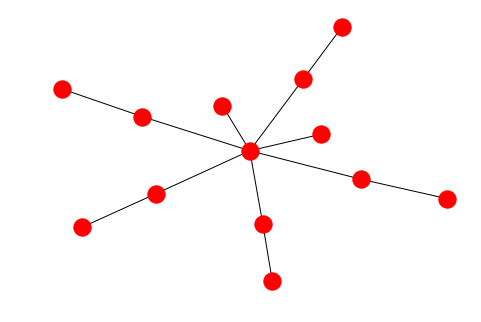

In [35]:
# Draw the graph without node labels
nx.draw(nx_graph)

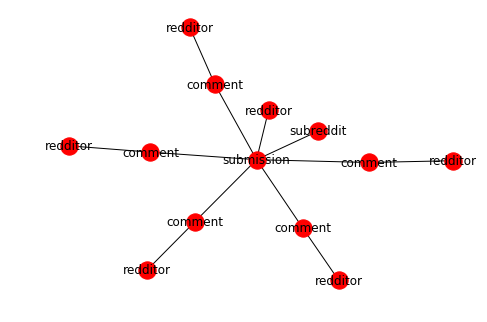

In [31]:
# Draw the graph with node labels
labels = dict((node, data["Label"]) for node, data in nx_graph.nodes(data=True))
nx.draw(nx_graph, labels=labels)

In [32]:
pos = nx.spring_layout(nx_graph)
edge_labels = {}
for edge in nx_graph.edges(data=True):
    key = (edge[0], edge[1])
    edge_labels[key] = edge[2]["Label"]

{('6l4z3', '9uolpb'): Text(0.19322,0.0485111,'SUBMISSION_CREATED_BY'),
 ('9uolpb', '2qh0y'): Text(0.0686802,-0.185007,'HAS_SUBMISSION'),
 ('9uolpb', 'e9cdg84'): Text(-0.125432,0.233973,'HAS_COMMENT'),
 ('9uolpb', 'e97on9s'): Text(-0.103793,-0.277626,'HAS_COMMENT'),
 ('9uolpb', 'e9f8d5j'): Text(-0.267016,-0.0227045,'HAS_COMMENT'),
 ('9uolpb', 'e97ls4a'): Text(0.285672,-0.155793,'HAS_COMMENT'),
 ('9uolpb', 'e98emf8'): Text(0.184657,0.241332,'HAS_COMMENT'),
 ('280nz34d', 'e9cdg84'): Text(-0.386658,0.668868,'COMMENT_CREATED_BY'),
 ('352mkri', 'e97on9s'): Text(-0.313761,-0.751502,'COMMENT_CREATED_BY'),
 ('104xax', 'e9f8d5j'): Text(-0.777597,-0.0472015,'COMMENT_CREATED_BY'),
 ('7owfi', 'e97ls4a'): Text(0.747329,-0.411971,'COMMENT_CREATED_BY'),
 ('oolw9', 'e98emf8'): Text(0.479368,0.673039,'COMMENT_CREATED_BY')}

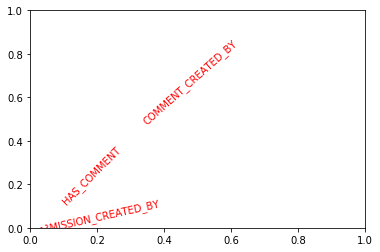

In [33]:
# Draw networkx labels
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels, font_color="red")